## GPU vs CPU Performance using Tensorflow<br><br>

>**_Dell XPS 15_**

>> `Hardware specification`:<br>

|Device|Maker|Model|
|:---:|:---:|:---:|
|**GPU**|_NVIDIA_|_GTX 1050Ti_|
|**CPU**|_Intel_|_i7 2.2GHz_|
<br>
<br>
<br>
>> `Environment specification`:<br>

|Envs|Version|
|:---:|:---:|
|**OS**|_windows 10_|
|**Anaconda**|_conda 4.6.7_|
|**Python**|_python 3.6.5_|
|**CUDA**|_cuda 10.0_|
|**cuDNN**|_cuDNN 7.5_|
|**Tensorflow**|_tensorflow-gpu 1.12.0_|
<br>
<br>

In [1]:
import tensorflow as tf
import time

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

with tf.Session() as sess:
    result = sess.run(sum_result)   

In [3]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [4]:
size=500
with tf.device("/cpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [5]:
size=500
with tf.device("/gpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [6]:
def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size],name='W')
        X = tf.random_normal([size, size],name='X')
        mul = tf.matmul(W, X,name='mul')
        sum_result = tf.reduce_sum(mul,name='sum')

    startTime = time.time() 
    tfconfig=tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes=time.time()  - startTime   
    print(device_name," size=",size,"Time:",takeTimes )
    return takeTimes

In [7]:
g=performanceTest("/gpu:0",100)
c=performanceTest("/cpu:0",100)

/gpu:0  size= 100 Time: 0.3830091953277588
/cpu:0  size= 100 Time: 0.4712038040161133


In [8]:
g=performanceTest("/gpu:0",1000)
c=performanceTest("/cpu:0",1000)

/gpu:0  size= 1000 Time: 0.5242938995361328
/cpu:0  size= 1000 Time: 0.5796182155609131


In [9]:
g=performanceTest("/gpu:0",5000)
c=performanceTest("/cpu:0",5000)

/gpu:0  size= 5000 Time: 0.8909614086151123
/cpu:0  size= 5000 Time: 2.8846499919891357


In [10]:
g=performanceTest("/gpu:0",7000)
c=performanceTest("/cpu:0",7000)

/gpu:0  size= 7000 Time: 1.3533763885498047
/cpu:0  size= 7000 Time: 6.0031445026397705


In [11]:
g=performanceTest("/gpu:0",9000)
c=performanceTest("/cpu:0",9000)

/gpu:0  size= 9000 Time: 1.8693008422851562
/cpu:0  size= 9000 Time: 12.266195297241211


In [12]:
g=performanceTest("/gpu:0",10000)
c=performanceTest("/cpu:0",10000)

/gpu:0  size= 10000 Time: 2.227973699569702
/cpu:0  size= 10000 Time: 16.08937406539917


#### Generate 0~9k matrix computations, print every 1000 computations.

In [13]:
gpu_set=[];cpu_set=[];i_set=[]
for i in range(0,9001,1000):
    g=performanceTest("/gpu:0",i)
    c=performanceTest("/cpu:0",i)
    gpu_set.append(g);cpu_set.append(c);i_set.append(i)
    print("--")

/gpu:0  size= 0 Time: 1.254274606704712
/cpu:0  size= 0 Time: 1.190256118774414
--
/gpu:0  size= 1000 Time: 1.2418813705444336
/cpu:0  size= 1000 Time: 1.097654104232788
--
/gpu:0  size= 2000 Time: 1.0823132991790771
/cpu:0  size= 2000 Time: 1.2542474269866943
--
/gpu:0  size= 3000 Time: 1.1809935569763184
/cpu:0  size= 3000 Time: 1.644972801208496
--
/gpu:0  size= 4000 Time: 1.339383602142334
/cpu:0  size= 4000 Time: 2.332369804382324
--
/gpu:0  size= 5000 Time: 1.515031337738037
/cpu:0  size= 5000 Time: 3.326023578643799
--
/gpu:0  size= 6000 Time: 1.704347848892212
/cpu:0  size= 6000 Time: 4.829031944274902
--
/gpu:0  size= 7000 Time: 1.9381330013275146
/cpu:0  size= 7000 Time: 6.752679109573364
--
/gpu:0  size= 8000 Time: 2.2342262268066406
/cpu:0  size= 8000 Time: 9.348477840423584
--
/gpu:0  size= 9000 Time: 2.741851329803467
/cpu:0  size= 9000 Time: 13.226650953292847
--


#### Plot time consumer GPU vs CPU.

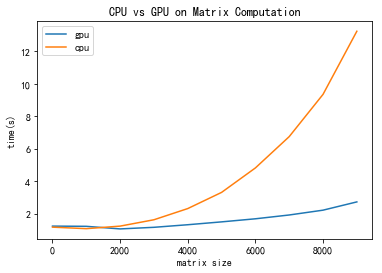

In [14]:
%matplotlib inline
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']

import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(i_set, gpu_set, label = 'gpu')
plt.plot(i_set, cpu_set, label = 'cpu')
plt.title('CPU vs GPU on Matrix Computation')
plt.ylabel('time(s)')
plt.xlabel('matrix size')
plt.legend()